Cleaned out NaN values, made data more useable, and created some charts.

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
df = pd.read_csv("./data/clean_data.csv").dropna(subset=['Area Name', 'Annual median wage(2)', '2022-05-31', 'Employment per 1,000 jobs'])
df = df.drop(132)

df['Annual median wage(2)'] = df['Annual median wage(2)'].astype(float)
df['Rent over income'] = df['2022-05-31']/(df['Annual median wage(2)']/12)
df['Disposable Income'] = (df['Annual median wage(2)'] - (df['2022-05-31']*12))

Area Name
Kokomo, IN(0029020)                                   0.073131
Carbondale-Marion, IL(0016060)                        0.081314
Springfield, OH(0044220)                              0.087852
Wausau, WI(0048140)                                   0.092248
Johnstown, PA(0027780)                                0.098281
                                                        ...   
Santa Fe, NM(0042140)                                 0.278921
Santa Maria-Santa Barbara, CA(0042200)                0.291540
Miami-Fort Lauderdale-West Palm Beach, FL(0033100)    0.293452
Kahului-Wailuku-Lahaina, HI(0027980)                  0.300784
Naples-Immokalee-Marco Island, FL(0034940)            0.391731
Name: Rent over income, Length: 319, dtype: float64


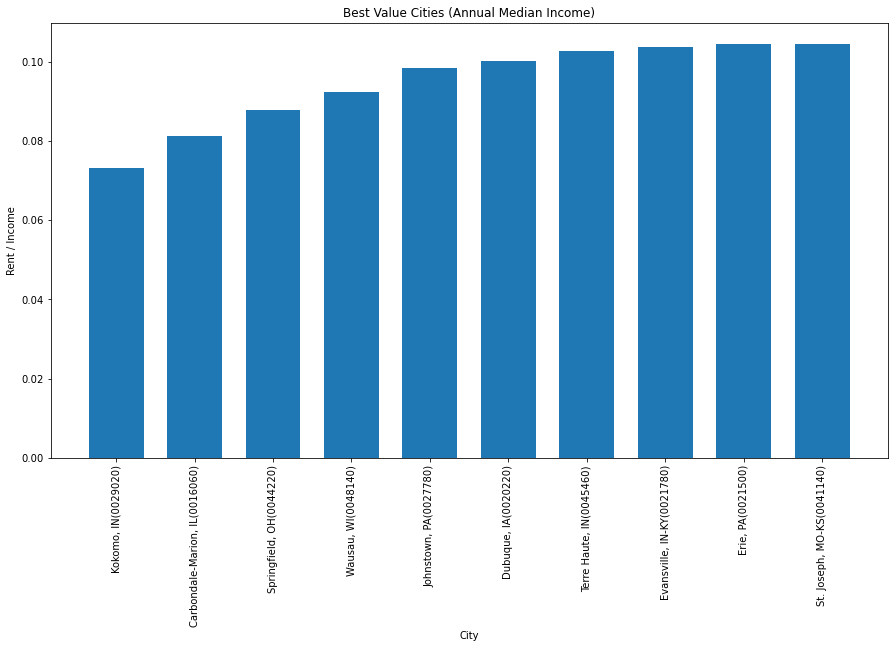

In [4]:
# Best Value (Annual Median)
areas = df.sort_values('Rent over income')['Area Name'].tolist()
rentPerc = df.sort_values('Rent over income')['Rent over income'].tolist()

print(df.groupby(['Area Name'])['Rent over income'].mean().sort_values())

plt.figure(figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Rent / Income')
plt.title('Best Value Cities (Annual Median Income)')
plt.xticks(range(len(areas[:10])), areas[:10], rotation='vertical')
gr = plt.bar(areas[:10], rentPerc[:10], width=0.7)

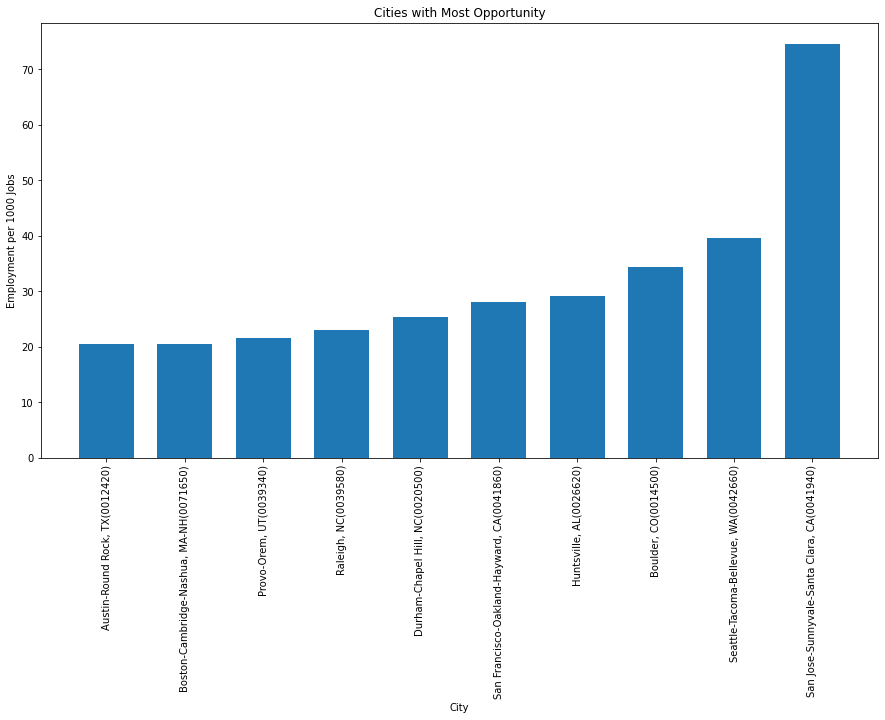

In [5]:
# Cities with most job opportunities
areas = df.sort_values('Employment per 1,000 jobs')['Area Name'].tolist()
jobOp = df.sort_values('Employment per 1,000 jobs')['Employment per 1,000 jobs'].tolist()

plt.figure(figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Employment per 1000 Jobs')
plt.title('Cities with Most Opportunity')
plt.xticks(range(len(areas[-10:])), areas[-10:], rotation='vertical')
gr = plt.bar(areas[-10:], jobOp[-10:], width=0.7)

Normalise values on a scale from zero to one, and rank them by averaging each score.

In [14]:
empMax = df.max()['Employment per 1,000 jobs']
diMax = df.max()['Disposable Income']

df['median rank'] = (((df['Disposable Income'])/diMax) + (df['Employment per 1,000 jobs']/empMax))/2
df.groupby(['Area Name'])['median rank'].mean().sort_values(ascending=False)

Area Name
San Jose-Sunnyvale-Santa Clara, CA(0041940)    1.000000
Seattle-Tacoma-Bellevue, WA(0042660)           0.672191
San Francisco-Oakland-Hayward, CA(0041860)     0.604664
Boulder, CO(0014500)                           0.586261
Durham-Chapel Hill, NC(0020500)                0.527504
                                                 ...   
Jonesboro, AR(0027860)                         0.226790
Tuscaloosa, AL(0046220)                        0.226698
Enid, OK(0021420)                              0.216864
Cape Girardeau, MO-IL(0016020)                 0.199803
Hattiesburg, MS(0025620)                       0.150375
Name: median rank, Length: 319, dtype: float64

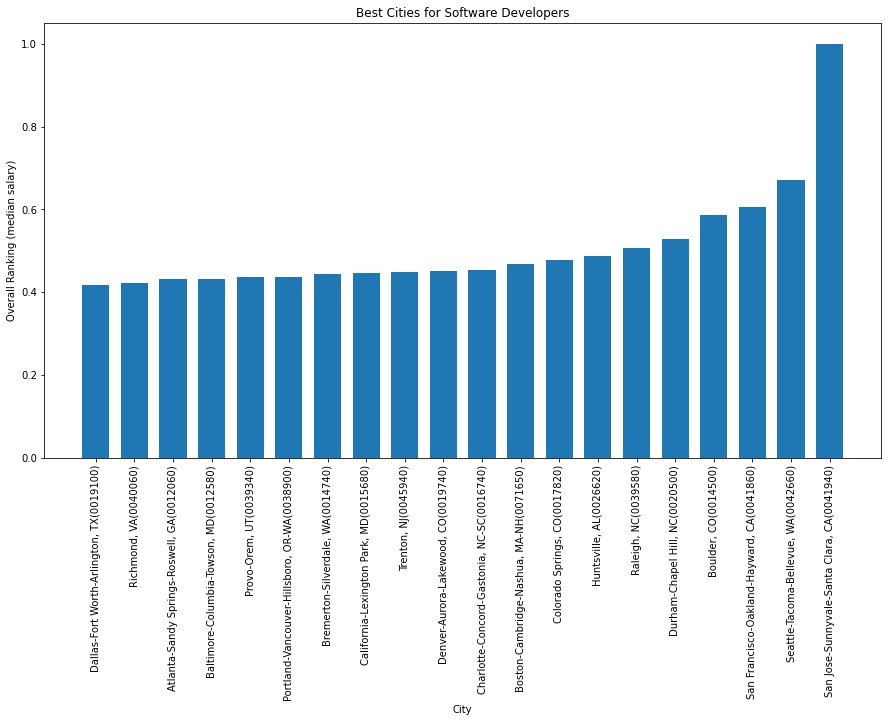

In [15]:
areas = df.sort_values('median rank')['Area Name'].tolist()
jobOp = df.sort_values('median rank')['median rank'].tolist()

plt.figure(figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Overall Ranking (median salary)')
plt.title('Best Cities for Software Developers')
plt.xticks(range(len(areas[-20:])), areas[-20:], rotation='vertical')
gr = plt.bar(areas[-20:], jobOp[-20:], width=0.7)

Linear Regression comparison between salary and rent.

In [4]:
import plotly.express as px
import pandas as pd

df = pd.read_csv("./data/clean_data.csv")

df['Annual median wage(2)'] = df['Annual median wage(2)'].astype(float)
df['Rent 2022-05-31'] = df['2022-05-31']
df['CityName'] = df['city'] + ', ' + df['state_id']


data = {
    'City': df['CityName'],
    'Rent_Price': df['Rent 2022-05-31'],
    'Annual Median Wage': df['Annual median wage(2)'],
}

new_df = pd.DataFrame(data, columns=['City', 'Rent_Price', 'Annual Median Wage'])

fig = px.scatter(new_df, x="Rent_Price", y="Annual Median Wage", hover_data=['City'], trendline="ols")

fig.update_layout(
    title="Rent Price vs Annual Median Wage",
    xaxis_title="Rent Price",
    yaxis_title="Annual Median Wage",
)

fig.show()